In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax


In [2]:
data  = pd.read_csv("data_for_lr.csv")
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


### Data Processing

In [8]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [35]:
data = data.dropna()
print("shape of the data",data.shape)

shape of the data (699, 2)


### Splitting Data

In [36]:
# training input and output
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)
# validation of data input and output
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.y[500:700]).reshape(199,1)

In [37]:
print(f"trainging input data shape={train_input.shape}")
print(f"trainging output data shape={train_output.shape}")
print(f"testing input data shape={test_input.shape}")
print(f"testing output data shape={test_output.shape}")

trainging input data shape=(500, 1)
trainging output data shape=(500, 1)
testing input data shape=(199, 1)
testing output data shape=(199, 1)


<font color="red" size='10px'><b>Linear Regression</b> </font>

forward propagation

f(x) = m*x + c

In [38]:
def forward_propagation(train_input,parameters):
    m = parameters["m"]
    c = parameters["c"]
    predictions = np.multiply(m,train_input)+c
    return predictions

<font color="red" size='50px'><b>Cost Function</b> </font>

summation(1/2n*(y-f(x))^2)

In [39]:
def cost_function(predictions,train_output):
    cost = ((train_output - predictions)**2)*0.5
    return cost

<font color="red" size='40px'><b>Gradient Descent for Backpropagation</b> </font>

1. **df = summ((f(x)) - y)/n**
2. **dm = df * x**
3. **dc = df * 1**

**(d(cost)/dm = d(cost)/df * df/dm)**

In [40]:
def backward_propagation(train_input,train_output,predictions):
    derivatives = dict()
    df = predictions - train_output
    dm = np.mean(np.multiply(df,train_input))
    dc = np.mean(df)
    derivatives["dm"] = dm
    derivatives["dc"] = dc
    return derivatives

Update Parameters

In [41]:
def update_parameters(parameters,derivatives,learning_rate):
    parameters["m"] = parameters["m"] -learning_rate * derivatives["dm"]
    parameters["m"] = parameters["m"] - learning_rate * derivatives["dc"]
    return parameters

<font color="red" size='50px'><b>Model Training</b> </font>

In [44]:
def train(train_input,train_output,learning_rate,iters):
    parameters = dict()

    # random parameters
    parameters["m"] = np.random.uniform(0,1) -1
    parameters["c"] = np.random.uniform(0,1) - 1
    
    plt.figure()

    # loss
    loss = list()
    # iteration
    for i in range(iters):

        # forward propagation
        predictions =forward_propagation(train_input,parameters)

        # cost
        cost = cost_function(predictions,train_output)

        loss.append(cost)
        print(f"iteration ={i+1},loss={cost}")

        #plot
        fig,ax = plt.subplots()
        ax.plot(train_input,train_output,"+",label ="Original")
        ax.plot(train_input,predictions,"+",label ="Training")
        legend = ax.legend()
        plt.plot(train_input,train_output,"+",label="Original")
        plt.plot(train_input,predictions,"+",label="Original")
        plt.show()

        # backpropagation
        derivatives = backward_propagation(train_input,train_output,predictions)

        # update parameters
        parameters = update_parameters(parameters,derivatives,learning_rate)

    return parameters

### Training

iteration =1,loss=[[2.70245811e+02]
 [1.25331918e+03]
 [1.73075880e+02]
 [7.51617446e+02]
 [4.15650316e+03]
 [5.97874366e+02]
 [7.27606300e+01]
 [3.56520486e+03]
 [3.47053232e+02]
 [3.20205298e+01]
 [8.01225616e+01]
 [1.11812927e+02]
 [3.45904513e+02]
 [8.66128852e+02]
 [1.30960998e+03]
 [2.08969040e+03]
 [4.11753112e+02]
 [2.72364506e+03]
 [4.87143581e+02]
 [3.71309901e+02]
 [2.61048441e+03]
 [3.94996518e+03]
 [1.79536980e+03]
 [1.42220317e+03]
 [3.76800994e+03]
 [1.79623424e+03]
 [1.27643757e+03]
 [3.35466843e+02]
 [4.86845315e+03]
 [1.27877033e+03]
 [3.26904448e+01]
 [2.81465048e+02]
 [9.97060961e+02]
 [7.13666771e-01]
 [2.10419887e+03]
 [4.53839798e+03]
 [8.68339487e+02]
 [2.52388539e+01]
 [2.92457302e+02]
 [2.07415482e+03]
 [3.94363644e+03]
 [8.84899037e-02]
 [2.10097287e+03]
 [2.75789796e+02]
 [6.40020726e+02]
 [1.83071446e+02]
 [1.88973897e+03]
 [1.53793404e+03]
 [2.79939119e+02]
 [6.87693977e+02]
 [4.05049306e+03]
 [1.01366146e+03]
 [1.31965636e+01]
 [2.05680232e+03]
 [1.816141

<Figure size 640x480 with 0 Axes>

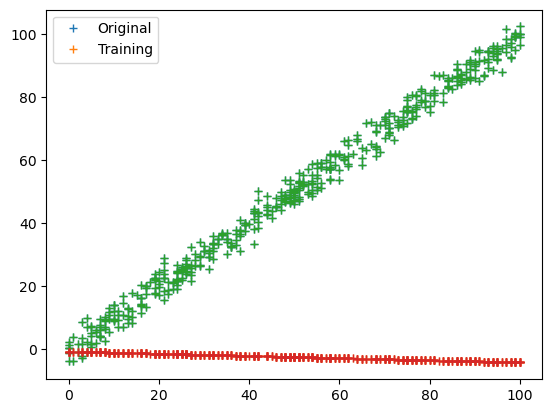

iteration =2,loss=[[1.11560463e+02]
 [5.36322200e+02]
 [8.99224634e+01]
 [3.27989974e+02]
 [1.86339461e+03]
 [2.44486541e+02]
 [3.12650523e+01]
 [1.58998986e+03]
 [1.56438964e+02]
 [1.96630773e+01]
 [2.53327324e+01]
 [4.43050748e+01]
 [1.61838399e+02]
 [3.95216225e+02]
 [5.27410859e+02]
 [9.62289491e+02]
 [1.93906175e+02]
 [1.17737320e+03]
 [2.24101844e+02]
 [1.36384109e+02]
 [1.18622248e+03]
 [1.72597497e+03]
 [7.93504317e+02]
 [5.99711252e+02]
 [1.66585128e+03]
 [7.94079035e+02]
 [5.63042749e+02]
 [1.80050967e+02]
 [2.27870574e+03]
 [5.76289287e+02]
 [2.24492740e+01]
 [1.13531403e+02]
 [4.53333673e+02]
 [7.13666771e-01]
 [9.72142954e+02]
 [1.98866992e+03]
 [3.96709969e+02]
 [1.09542613e+01]
 [1.43019210e+02]
 [8.34722863e+02]
 [1.78329712e+03]
 [8.84899037e-02]
 [1.00069572e+03]
 [1.42906381e+02]
 [2.71696762e+02]
 [7.88156039e+01]
 [8.42372841e+02]
 [7.14386671e+02]
 [1.45897574e+02]
 [3.29173265e+02]
 [1.83435195e+03]
 [4.43678092e+02]
 [5.80012938e+00]
 [9.55089020e+02]
 [1.009666

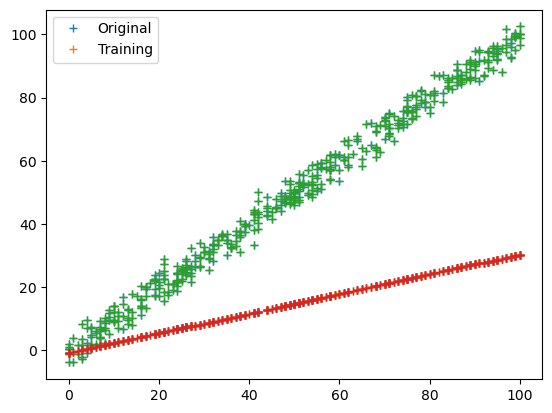

iteration =3,loss=[[4.39869942e+01]
 [2.24137919e+02]
 [4.93720833e+01]
 [1.41326289e+02]
 [8.36423527e+02]
 [9.48898303e+01]
 [1.31518021e+01]
 [7.08150500e+02]
 [7.07930212e+01]
 [1.30723274e+01]
 [5.82351936e+00]
 [1.62912284e+01]
 [7.72926293e+01]
 [1.82084742e+02]
 [1.99460289e+02]
 [4.49266918e+02]
 [9.34619953e+01]
 [4.99937212e+02]
 [1.04475843e+02]
 [4.35887270e+01]
 [5.43203371e+02]
 [7.45223822e+02]
 [3.48637261e+02]
 [2.44816600e+02]
 [7.32244581e+02]
 [3.49018245e+02]
 [2.46643096e+02]
 [1.02887534e+02]
 [1.08889970e+03]
 [2.60697418e+02]
 [1.66715006e+01]
 [4.30521562e+01]
 [2.07769802e+02]
 [7.13666771e-01]
 [4.56007550e+02]
 [8.62359082e+02]
 [1.83099095e+02]
 [4.68067582e+00]
 [7.25965021e+01]
 [3.15300886e+02]
 [8.10784590e+02]
 [8.84899037e-02]
 [4.90020069e+02]
 [7.82010482e+01]
 [1.12112148e+02]
 [3.32537359e+01]
 [3.74907728e+02]
 [3.37709356e+02]
 [8.04177922e+01]
 [1.62293641e+02]
 [8.35832275e+02]
 [1.92065232e+02]
 [2.52684817e+00]
 [4.51281562e+02]
 [6.015158

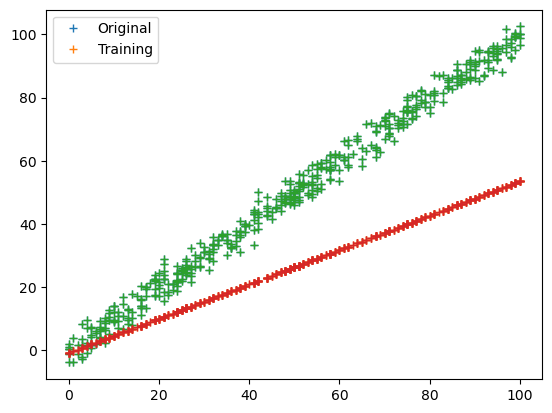

iteration =4,loss=[[1.60342874e+01]
 [9.01790781e+01]
 [2.89878453e+01]
 [5.97080173e+01]
 [3.76148185e+02]
 [3.36302893e+01]
 [5.34788092e+00]
 [3.14766007e+02]
 [3.22212211e+01]
 [9.41305588e+00]
 [4.37194114e-01]
 [5.21779365e+00]
 [3.79904228e+01]
 [8.50711342e+01]
 [6.74053085e+01]
 [2.13918520e+02]
 [4.65204493e+01]
 [2.06376777e+02]
 [4.96441434e+01]
 [1.02893047e+01]
 [2.51563857e+02]
 [3.15856082e+02]
 [1.51803730e+02]
 [9.47439191e+01]
 [3.19053500e+02]
 [1.52055163e+02]
 [1.06903284e+02]
 [6.32559557e+01]
 [5.35623191e+02]
 [1.18595497e+02]
 [1.32865886e+01]
 [1.46224349e+01]
 [9.63390840e+01]
 [7.13666771e-01]
 [2.18577580e+02]
 [3.67968579e+02]
 [8.57649160e+01]
 [1.95158435e+00]
 [3.86992329e+01]
 [1.06311665e+02]
 [3.71576901e+02]
 [8.84899037e-02]
 [2.49179859e+02]
 [4.57333959e+01]
 [4.41736242e+01]
 [1.35874562e+01]
 [1.66463402e+02]
 [1.63645520e+02]
 [4.74322600e+01]
 [8.32833656e+01]
 [3.84289968e+02]
 [8.17358232e+01]
 [1.08599181e+00]
 [2.18534848e+02]
 [3.872266

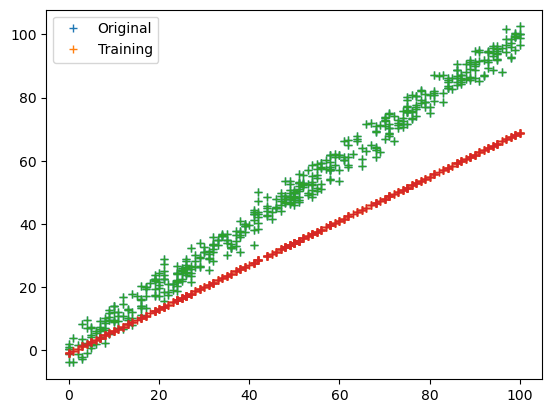

iteration =5,loss=[[5.04869791e+00]
 [3.40485643e+01]
 [1.83671441e+01]
 [2.44492764e+01]
 [1.69628119e+02]
 [1.00054138e+01]
 [2.05598935e+00]
 [1.39489806e+02]
 [1.47901627e+01]
 [7.30056194e+00]
 [2.60469379e-01]
 [1.23805782e+00]
 [1.94153413e+01]
 [4.05476423e+01]
 [1.81137887e+01]
 [1.04705520e+02]
 [2.41748355e+01]
 [8.13701088e+01]
 [2.42299429e+01]
 [8.79432293e-01]
 [1.18409181e+02]
 [1.30004151e+02]
 [6.51883388e+01]
 [3.34038327e+01]
 [1.37155339e+02]
 [6.53531400e+01]
 [4.55824243e+01]
 [4.21058307e+01]
 [2.74017083e+02]
 [5.43972665e+01]
 [1.12371454e+01]
 [3.97345766e+00]
 [4.54259830e+01]
 [7.13666771e-01]
 [1.07972618e+02]
 [1.53085309e+02]
 [4.10270554e+01]
 [7.82216301e-01]
 [2.19322406e+01]
 [2.84258350e+01]
 [1.72281247e+02]
 [8.84899037e-02]
 [1.33136886e+02]
 [2.88520393e+01]
 [1.60824647e+01]
 [5.26646967e+00]
 [7.36491893e+01]
 [8.20478360e+01]
 [3.02045933e+01]
 [4.50188914e+01]
 [1.79007199e+02]
 [3.38604478e+01]
 [4.56968065e-01]
 [1.09469454e+02]
 [2.701537

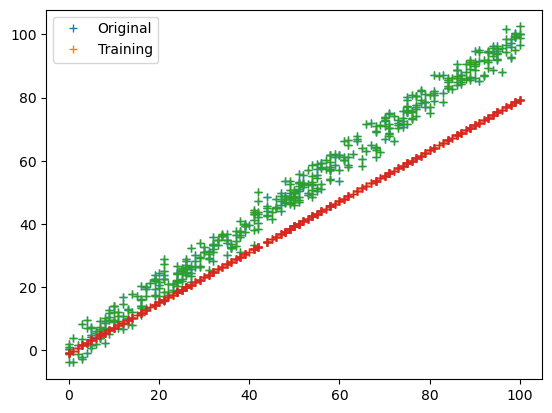

iteration =6,loss=[[1.14870438e+00]
 [1.14709305e+01]
 [1.26111568e+01]
 [9.51080718e+00]
 [7.68112179e+01]
 [1.96112516e+00]
 [7.16215057e-01]
 [6.15351418e+01]
 [6.87319964e+00]
 [6.03749448e+00]
 [1.67391415e+00]
 [1.08401698e-01]
 [1.04401997e+01]
 [1.98744505e+01]
 [2.59832495e+00]
 [5.32124330e+01]
 [1.32766016e+01]
 [2.96601129e+01]
 [1.22669013e+01]
 [3.36547784e-01]
 [5.70326114e+01]
 [5.10081811e+01]
 [2.73944719e+01]
 [9.83140578e+00]
 [5.77340567e+01]
 [2.75013418e+01]
 [1.89416617e+01]
 [3.03557490e+01]
 [1.47540668e+02]
 [2.52520446e+01]
 [9.96239433e+00]
 [5.91721093e-01]
 [2.19338577e+01]
 [7.13666771e-01]
 [5.55487156e+01]
 [6.11374041e+01]
 [2.02105137e+01]
 [2.93413466e-01]
 [1.33584901e+01]
 [4.00793986e+00]
 [8.12261357e+01]
 [8.84899037e-02]
 [7.56645826e+01]
 [1.97231808e+01]
 [5.05153981e+00]
 [1.86199223e+00]
 [3.24101249e+01]
 [4.30443950e+01]
 [2.08441548e+01]
 [2.59465379e+01]
 [8.49595720e+01]
 [1.34287300e+01]
 [1.85907807e-01]
 [5.73631075e+01]
 [2.035926

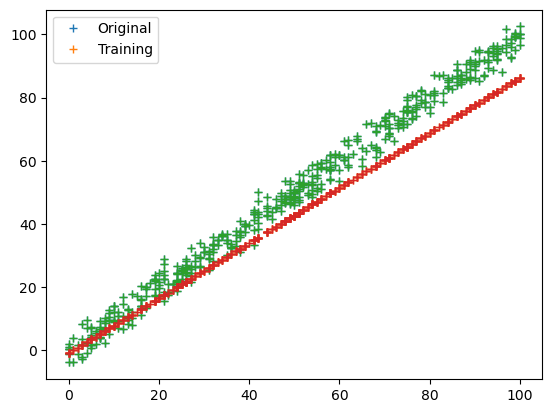

iteration =7,loss=[[8.17628241e-02]
 [3.06152523e+00]
 [9.36404453e+00]
 [3.38457723e+00]
 [3.49937516e+01]
 [4.91288852e-02]
 [2.05551394e-01]
 [2.69593887e+01]
 [3.25117469e+00]
 [5.25975639e+00]
 [3.30398916e+00]
 [3.78868266e-02]
 [5.97947014e+00]
 [1.01193736e+01]
 [2.43969001e-02]
 [2.84099614e+01]
 [7.79742327e+00]
 [9.33830452e+00]
 [6.51711400e+00]
 [2.54454604e+00]
 [2.83605606e+01]
 [1.84328709e+01]
 [1.11213803e+01]
 [1.86972844e+00]
 [2.35018730e+01]
 [1.11895112e+01]
 [7.55035144e+00]
 [2.35685321e+01]
 [8.46354630e+01]
 [1.19264737e+01]
 [9.15276502e+00]
 [2.43475902e-03]
 [1.09438543e+01]
 [7.13666771e-01]
 [3.01238010e+01]
 [2.27904391e+01]
 [1.03595777e+01]
 [9.76405436e-02]
 [8.80499883e+00]
 [5.04211179e-02]
 [3.92143268e+01]
 [8.84899037e-02]
 [4.62323789e+01]
 [1.45844553e+01]
 [1.14235838e+00]
 [5.51201647e-01]
 [1.41462230e+01]
 [2.39211463e+01]
 [1.55505701e+01]
 [1.61061940e+01]
 [4.13987831e+01]
 [4.94540647e+00]
 [7.15320706e-02]
 [3.18321757e+01]
 [1.643265

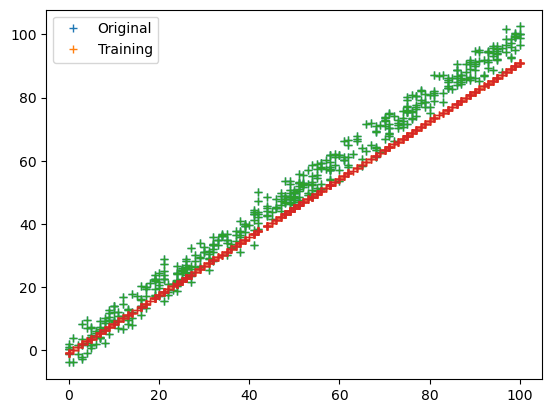

iteration =8,loss=[[5.73847032e-02]
 [4.28952045e-01]
 [7.46185428e+00]
 [1.01544197e+00]
 [1.60852284e+01]
 [3.21023313e-01]
 [3.63402700e-02]
 [1.16875378e+01]
 [1.57681470e+00]
 [4.76958589e+00]
 [4.70029578e+00]
 [2.96996748e-01]
 [3.68564153e+00]
 [5.41572069e+00]
 [1.79172791e+00]
 [1.61312036e+01]
 [4.94218489e+00]
 [2.12427504e+00]
 [3.67831404e+00]
 [5.17073568e+00]
 [1.47192423e+01]
 [5.70464407e+00]
 [4.26394352e+00]
 [3.42326953e-02]
 [9.05195918e+00]
 [4.30616933e+00]
 [2.80531902e+00]
 [1.95084084e+01]
 [5.22606751e+01]
 [5.77194194e+00]
 [8.63050155e+00]
 [3.56088913e-01]
 [5.70510830e+00]
 [7.13666771e-01]
 [1.74288112e+01]
 [7.49471530e+00]
 [5.59182311e+00]
 [2.53465713e-02]
 [6.28763357e+00]
 [2.93588834e+00]
 [1.95621216e+01]
 [8.84899037e-02]
 [3.05753491e+01]
 [1.15800323e+01]
 [7.87207076e-02]
 [1.06546252e-01]
 [6.09748913e+00]
 [1.42449796e+01]
 [1.24425917e+01]
 [1.08287023e+01]
 [2.09129457e+01]
 [1.58866635e+00]
 [2.49567593e-02]
 [1.89239267e+01]
 [1.404138

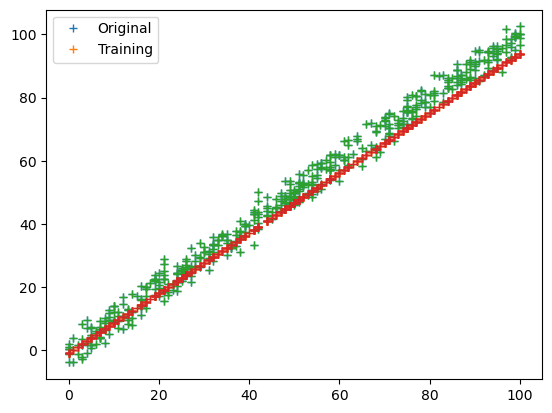

iteration =9,loss=[[3.49224295e-01]
 [5.95074409e-03]
 [6.31021370e+00]
 [2.03677578e-01]
 [7.49013366e+00]
 [1.19615926e+00]
 [2.22927335e-04]
 [4.98506455e+00]
 [7.91512959e-01]
 [4.45517954e+00]
 [5.77096781e+00]
 [6.07217158e-01]
 [2.45988324e+00]
 [3.08404004e+00]
 [4.53352080e+00]
 [9.84619373e+00]
 [3.39450461e+00]
 [1.51044664e-01]
 [2.22989594e+00]
 [7.44099160e+00]
 [8.07088531e+00]
 [1.24235796e+00]
 [1.47795764e+00]
 [3.66789400e-01]
 [3.16393012e+00]
 [1.50286054e+00]
 [9.16739217e-01]
 [1.70073615e+01]
 [3.49446600e+01]
 [2.88892794e+00]
 [8.28981969e+00]
 [9.26934828e-01]
 [3.14560425e+00]
 [7.13666771e-01]
 [1.08654640e+01]
 [1.89329062e+00]
 [3.21727721e+00]
 [3.21649064e-03]
 [4.84017407e+00]
 [7.33911187e+00]
 [1.01952829e+01]
 [8.84899037e-02]
 [2.19050120e+01]
 [9.76407641e+00]
 [6.07767258e-02]
 [2.32534126e-03]
 [2.57746554e+00]
 [9.16590826e+00]
 [1.05573874e+01]
 [7.88218549e+00]
 [1.10790607e+01]
 [3.79687595e-01]
 [7.18570661e-03]
 [1.21543103e+01]
 [1.254717

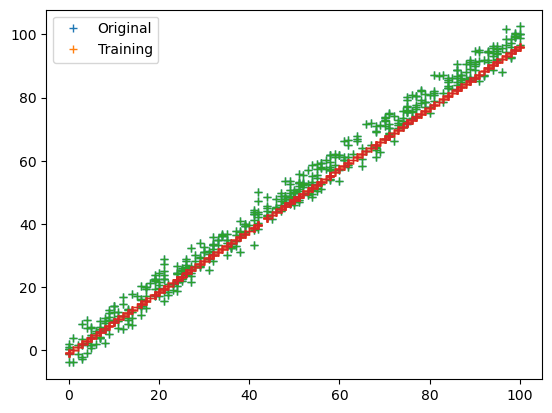

iteration =10,loss=[[6.82170919e-01]
 [3.21139626e-01]
 [5.59392812e+00]
 [6.28023693e-03]
 [3.55319685e+00]
 [2.09139959e+00]
 [1.05188471e-02]
 [2.07260243e+00]
 [4.15889252e-01]
 [4.25091429e+00]
 [6.54817452e+00]
 [8.75904397e-01]
 [1.77800124e+00]
 [1.88868378e+00]
 [7.06454634e+00]
 [6.50455855e+00]
 [2.52127317e+00]
 [1.06340857e-01]
 [1.46251332e+00]
 [9.18901961e+00]
 [4.73123979e+00]
 [6.90600568e-02]
 [4.19688801e-01]
 [1.28674136e+00]
 [9.14507197e-01]
 [4.33007752e-01]
 [2.28202307e-01]
 [1.54305819e+01]
 [2.53030074e+01]
 [1.51220127e+00]
 [8.06583082e+00]
 [1.45817683e+00]
 [1.85603159e+00]
 [7.13666771e-01]
 [7.33770264e+00]
 [2.16601405e-01]
 [1.99325665e+00]
 [1.39783166e-04]
 [3.97774401e+00]
 [1.13897378e+01]
 [5.61955483e+00]
 [8.84899037e-02]
 [1.69118352e+01]
 [8.63609244e+00]
 [3.58808078e-01]
 [1.89909061e-02]
 [1.05632928e+00]
 [6.39171095e+00]
 [9.38309662e+00]
 [6.17234033e+00]
 [6.23144383e+00]
 [3.43669626e-02]
 [1.28260472e-03]
 [8.46014796e+00]
 [1.15948

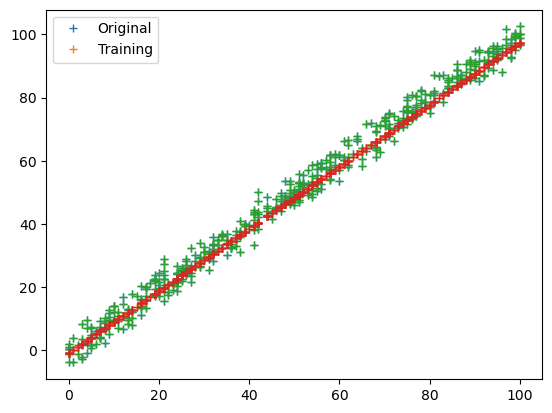

iteration =11,loss=[[9.66430804e-01]
 [7.99339607e-01]
 [5.13901157e+00]
 [2.87473055e-02]
 [1.73021267e+00]
 [2.82868943e+00]
 [3.28078231e-02]
 [8.26863715e-01]
 [2.31564702e-01]
 [4.11699495e+00]
 [7.09528317e+00]
 [1.08296241e+00]
 [1.38363791e+00]
 [1.25204540e+00]
 [9.06899276e+00]
 [4.65508355e+00]
 [2.00965034e+00]
 [6.46502821e-01]
 [1.03932279e+00]
 [1.04607390e+01]
 [2.99263499e+00]
 [9.41411162e-02]
 [7.18718368e-02]
 [2.21385127e+00]
 [1.65098883e-01]
 [7.74445161e-02]
 [2.46133598e-02]
 [1.44189670e+01]
 [1.97220411e+01]
 [8.38038552e-01]
 [7.91775941e+00]
 [1.88027990e+00]
 [1.18238431e+00]
 [7.13666771e-01]
 [5.36376371e+00]
 [2.05912222e-02]
 [1.33745026e+00]
 [3.32401250e-03]
 [3.44820563e+00]
 [1.45930607e+01]
 [3.31452955e+00]
 [8.84899037e-02]
 [1.39327169e+01]
 [7.92041846e+00]
 [6.96739971e-01]
 [6.87523122e-02]
 [4.11505300e-01]
 [4.81482035e+00]
 [8.63645693e+00]
 [5.14544746e+00]
 [3.76268285e+00]
 [1.05470637e-02]
 [9.46706427e-06]
 [6.36220578e+00]
 [1.09790

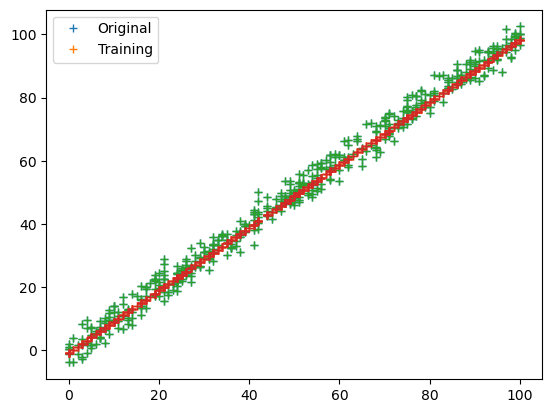

iteration =12,loss=[[1.18407026e+00]
 [1.23870227e+00]
 [4.84556842e+00]
 [1.12844588e-01]
 [8.73231318e-01]
 [3.38371430e+00]
 [5.46008270e-02]
 [3.07673119e-01]
 [1.38202272e-01]
 [4.02863799e+00]
 [7.47338436e+00]
 [1.23366930e+00]
 [1.14747714e+00]
 [8.99077408e-01]
 [1.05488667e+01]
 [3.59053144e+00]
 [1.69986076e+00]
 [1.26262444e+00]
 [7.96561272e-01]
 [1.13571161e+01]
 [2.05120537e+00]
 [4.72974289e-01]
 [2.00257029e-04]
 [2.97330250e+00]
 [1.48620457e-03]
 [5.92948571e-04]
 [3.32322082e-03]
 [1.37616267e+01]
 [1.63774702e+01]
 [4.97432375e-01]
 [7.81950834e+00]
 [2.19243999e+00]
 [8.16292041e-01]
 [7.13666771e-01]
 [4.21598167e+00]
 [3.03240629e-01]
 [9.71664464e-01]
 [7.79723276e-03]
 [3.11519464e+00]
 [1.69563337e+01]
 [2.11066460e+00]
 [8.84899037e-02]
 [1.21014752e+01]
 [7.45911047e+00]
 [9.84711308e-01]
 [1.19296471e-01]
 [1.46819658e-01]
 [3.88476046e+00]
 [8.15444194e+00]
 [4.51084886e+00]
 [2.45741074e+00]
 [8.72266185e-02]
 [3.53979711e-04]
 [5.12580954e+00]
 [1.05765

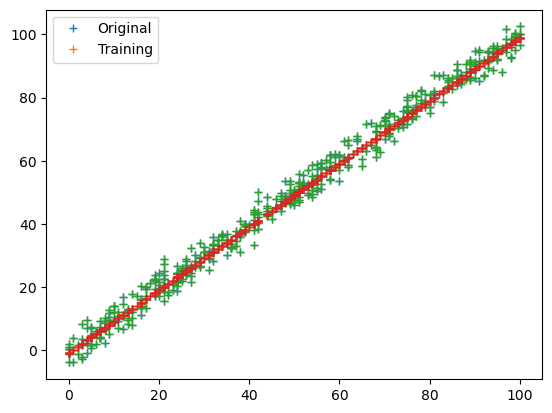

iteration =13,loss=[[1.34192810e+00]
 [1.58598285e+00]
 [4.65415368e+00]
 [1.99968547e-01]
 [4.62064415e-01]
 [3.78258518e+00]
 [7.22541597e-02]
 [1.00827970e-01]
 [8.91390406e-02]
 [3.97008781e+00]
 [7.73169925e+00]
 [1.33992398e+00]
 [1.00187550e+00]
 [6.95579718e-01]
 [1.16008429e+01]
 [2.95566262e+00]
 [1.50716204e+00]
 [1.78861798e+00]
 [6.52214085e-01]
 [1.19770859e+01]
 [1.52057305e+00]
 [8.88205460e-01]
 [2.42297111e-02]
 [3.54352694e+00]
 [4.30067371e-02]
 [2.11585075e-02]
 [4.04443094e-02]
 [1.33306147e+01]
 [1.43141926e+01]
 [3.18949676e-01]
 [7.75414939e+00]
 [2.41455259e+00]
 [6.09215881e-01]
 [7.13666771e-01]
 [3.52545641e+00]
 [6.77254478e-01]
 [7.59595421e-01]
 [1.18366289e-02]
 [2.90194088e+00]
 [1.86355799e+01]
 [1.45656095e+00]
 [8.84899037e-02]
 [1.09488674e+01]
 [7.15835237e+00]
 [1.20500156e+00]
 [1.60817589e-01]
 [4.42818770e-02]
 [3.31845872e+00]
 [7.83983692e+00]
 [4.10978217e+00]
 [1.73911034e+00]
 [1.79914287e-01]
 [1.11911371e-03]
 [4.37348188e+00]
 [1.03116

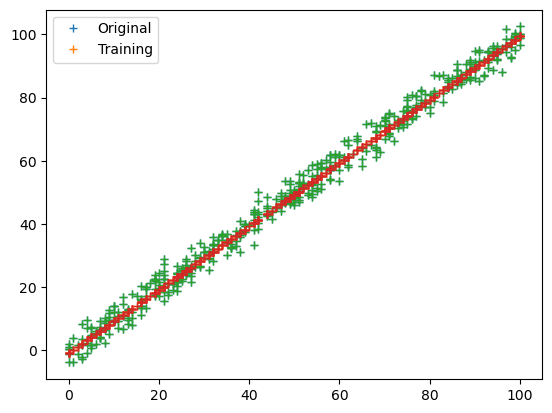

iteration =14,loss=[[1.45299825e+00]
 [1.84212451e+00]
 [4.52830540e+00]
 [2.72040909e-01]
 [2.59512067e-01]
 [4.06170931e+00]
 [8.54364387e-02]
 [2.52654719e-02]
 [6.23082655e-02]
 [3.93117401e+00]
 [7.90688493e+00]
 [1.41342590e+00]
 [9.10020116e-01]
 [5.74047800e-01]
 [1.23321987e+01]
 [2.56555548e+00]
 [1.38476900e+00]
 [2.19132584e+00]
 [5.63732295e-01]
 [1.24008562e+01]
 [1.20996423e+00]
 [1.23827145e+00]
 [7.24752334e-02]
 [3.95273183e+00]
 [1.38262862e-01]
 [6.70876982e-02]
 [8.82331516e-02]
 [1.30462198e+01]
 [1.30119409e+01]
 [2.21634903e-01]
 [7.71059643e+00]
 [2.56905904e+00]
 [4.87615323e-01]
 [7.13666771e-01]
 [3.09813140e+00]
 [1.01008841e+00]
 [6.32331778e-01]
 [1.50064901e-02]
 [2.76355475e+00]
 [1.98027327e+01]
 [1.08664818e+00]
 [8.84899037e-02]
 [1.02102872e+01]
 [6.96068625e+00]
 [1.36470755e+00]
 [1.92036045e-01]
 [9.01008948e-03]
 [2.96464738e+00]
 [7.63291126e+00]
 [3.85200234e+00]
 [1.32788523e+00]
 [2.60413149e-01]
 [1.86989076e-03]
 [3.90369093e+00]
 [1.01363

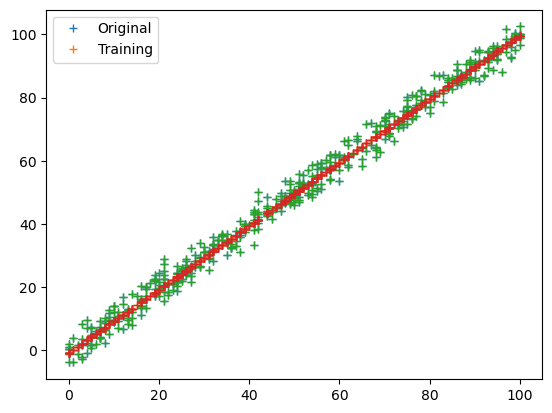

iteration =15,loss=[[1.52973533e+00]
 [2.02410128e+00]
 [4.44511212e+00]
 [3.26412493e-01]
 [1.56437982e-01]
 [4.25390489e+00]
 [9.48674404e-02]
 [2.79899627e-03]
 [4.70395832e-02]
 [3.90525900e+00]
 [8.02512782e+00]
 [1.46367213e+00]
 [8.51059425e-01]
 [4.99284152e-01]
 [1.28337340e+01]
 [2.32008595e+00]
 [1.30581528e+00]
 [2.48341268e+00]
 [5.08161010e-01]
 [1.26883449e+01]
 [1.02203565e+00]
 [1.50473723e+00]
 [1.19125863e-01]
 [4.23884240e+00]
 [2.32141243e-01]
 [1.12189380e-01]
 [1.30459452e-01]
 [1.28577538e+01]
 [1.21757611e+01]
 [1.66414483e-01]
 [7.68154069e+00]
 [2.67505187e+00]
 [4.13845136e-01]
 [7.13666771e-01]
 [2.82777401e+00]
 [1.26965037e+00]
 [5.53735285e-01]
 [1.73357818e-02]
 [2.67290119e+00]
 [2.06029939e+01]
 [8.69464768e-01]
 [8.84899037e-02]
 [9.73078174e+00]
 [6.83004956e+00]
 [1.47704735e+00]
 [2.14456121e-01]
 [3.12525276e-04]
 [2.73917619e+00]
 [7.49608266e+00]
 [3.68428098e+00]
 [1.08379881e+00]
 [3.22523978e-01]
 [2.47887079e-03]
 [3.60442727e+00]
 [1.00200

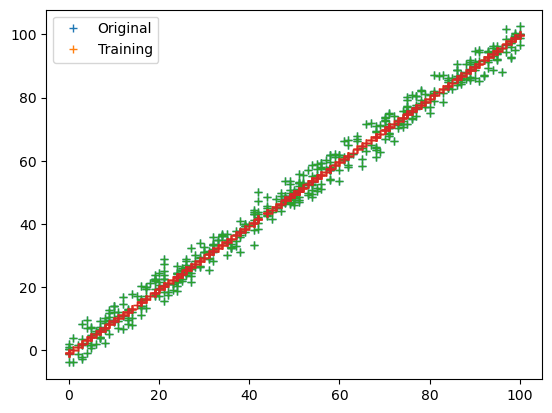

iteration =16,loss=[[1.58215164e+00]
 [2.15057204e+00]
 [4.38991051e+00]
 [3.65533005e-01]
 [1.01988317e-01]
 [4.38490622e+00]
 [1.01449438e-01]
 [3.24285519e-04]
 [3.80247008e-02]
 [3.88797727e+00]
 [8.10468733e+00]
 [1.49776178e+00]
 [8.12733662e-01]
 [4.52198277e-01]
 [1.31746914e+01]
 [2.16282419e+00]
 [1.25431129e+00]
 [2.68892567e+00]
 [4.72608616e-01]
 [1.28824286e+01]
 [9.05210467e-01]
 [1.69740153e+00]
 [1.56755572e-01]
 [4.43574384e+00]
 [3.08413929e-01]
 [1.48783296e-01]
 [1.63288715e-01]
 [1.27324903e+01]
 [1.16320940e+01]
 [1.33894897e-01]
 [7.66214151e+00]
 [2.74712543e+00]
 [3.67888365e-01]
 [7.13666771e-01]
 [2.65386956e+00]
 [1.45976368e+00]
 [5.04086358e-01]
 [1.89871150e-02]
 [2.61312397e+00]
 [2.11469784e+01]
 [7.37728194e-01]
 [8.84899037e-02]
 [9.41656710e+00]
 [6.74338232e+00]
 [1.55464856e+00]
 [2.30139047e-01]
 [1.15427597e-03]
 [2.59337674e+00]
 [7.40527484e+00]
 [3.57420735e+00]
 [9.34395234e-01]
 [3.67760793e-01]
 [2.93391593e-03]
 [3.41096538e+00]
 [9.94257

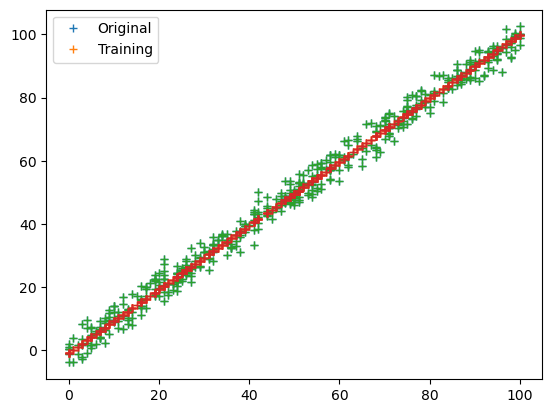

iteration =17,loss=[[1.61769544e+00]
 [2.23728213e+00]
 [4.35318924e+00]
 [3.92928184e-01]
 [7.20509769e-02]
 [4.47361619e+00]
 [1.05974027e-01]
 [4.28085950e-03]
 [3.25309283e-02]
 [3.87644223e+00]
 [8.15810829e+00]
 [1.52077672e+00]
 [7.87597584e-01]
 [4.22012481e-01]
 [1.34051861e+01]
 [2.06074109e+00]
 [1.22044837e+00]
 [2.83091143e+00]
 [4.49553757e-01]
 [1.30130357e+01]
 [8.31043398e-01]
 [1.83271108e+00]
 [1.84795959e-01]
 [4.56990722e+00]
 [3.65452813e-01]
 [1.76131042e-01]
 [1.87295384e-01]
 [1.26490678e+01]
 [1.12754676e+01]
 [1.14119359e-01]
 [7.64918282e+00]
 [2.79585609e+00]
 [3.38665439e-01]
 [7.13666771e-01]
 [2.54065737e+00]
 [1.59429105e+00]
 [4.72186630e-01]
 [2.01332817e-02]
 [2.57352769e+00]
 [2.15146995e+01]
 [6.55669789e-01]
 [8.84899037e-02]
 [9.20932664e+00]
 [6.68573607e+00]
 [1.60764947e+00]
 [2.40935086e-01]
 [4.69435794e-03]
 [2.49810415e+00]
 [7.34485976e+00]
 [3.50153172e+00]
 [8.40667319e-01]
 [3.99666781e-01]
 [3.25958966e-03]
 [3.28457322e+00]
 [9.89094

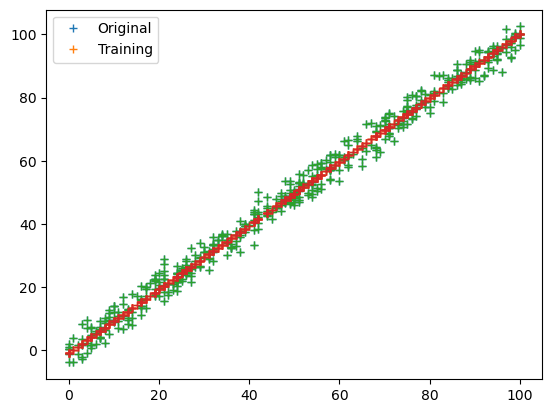

iteration =18,loss=[[1.64168413e+00]
 [2.29622191e+00]
 [4.32871951e+00]
 [4.11799796e-01]
 [5.49264324e-02]
 [4.53343284e+00]
 [1.09054724e-01]
 [9.43590874e-03]
 [2.90962348e-02]
 [3.86873822e+00]
 [8.19392918e+00]
 [1.53626489e+00]
 [7.71009200e-01]
 [4.02408729e-01]
 [1.35604347e+01]
 [1.99385420e+00]
 [1.19806253e+00]
 [2.92789641e+00]
 [4.34458448e-01]
 [1.31007412e+01]
 [7.83215797e-01]
 [1.92608832e+00]
 [2.04833333e-01]
 [4.66073846e+00]
 [4.06293699e-01]
 [1.95705241e-01]
 [2.04267081e-01]
 [1.25934355e+01]
 [1.10400868e+01]
 [1.01776481e-01]
 [7.64052337e+00]
 [2.82868166e+00]
 [3.19798501e-01]
 [7.13666771e-01]
 [2.46632839e+00]
 [1.68755829e+00]
 [4.51436760e-01]
 [2.09184716e-02]
 [2.54721804e+00]
 [2.17623657e+01]
 [6.03495315e-01]
 [8.84899037e-02]
 [9.07203001e+00]
 [6.64732567e+00]
 [1.64358722e+00]
 [2.48292539e-01]
 [8.39294748e-03]
 [2.43538945e+00]
 [7.30459782e+00]
 [3.45334949e+00]
 [7.80753994e-01]
 [4.21742970e-01]
 [3.48693130e-03]
 [3.20138518e+00]
 [9.85650

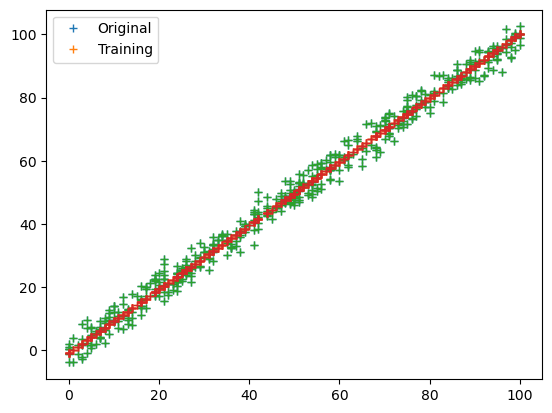

iteration =19,loss=[[1.65782405e+00]
 [2.33606292e+00]
 [4.31239491e+00]
 [4.24666332e-01]
 [4.47695786e-02]
 [4.57365431e+00]
 [1.11139436e-01]
 [1.40051912e-02]
 [2.69063181e-02]
 [3.86359078e+00]
 [8.21792665e+00]
 [1.54666572e+00]
 [7.60014935e-01]
 [3.89559680e-01]
 [1.36647493e+01]
 [1.94974214e+00]
 [1.18320857e+00]
 [2.99366233e+00]
 [4.24507934e-01]
 [1.31595548e+01]
 [7.52023934e-01]
 [1.98982481e+00]
 [2.18807781e-01]
 [4.72197666e+00]
 [4.34811012e-01]
 [2.09369961e-01]
 [2.16026796e-01]
 [1.25563022e+01]
 [1.08840713e+01]
 [9.39167399e-02]
 [7.63473547e+00]
 [2.85073924e+00]
 [3.07483723e-01]
 [7.13666771e-01]
 [2.41723974e+00]
 [1.75140592e+00]
 [4.37821295e-01]
 [2.14519138e-02]
 [2.52970000e+00]
 [2.19287727e+01]
 [5.69812588e-01]
 [8.84899037e-02]
 [8.98079408e+00]
 [6.62170210e+00]
 [1.66784070e+00]
 [2.53274260e-01]
 [1.14615425e-02]
 [2.39389649e+00]
 [7.27773611e+00]
 [3.42131592e+00]
 [7.41925144e-01]
 [4.36836571e-01]
 [3.64323180e-03]
 [3.14635206e+00]
 [9.83350

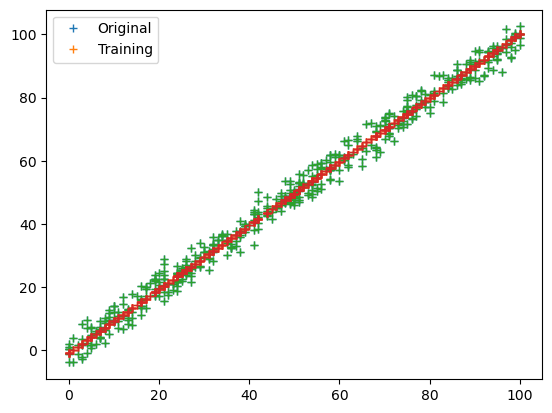

iteration =20,loss=[[1.66866098e+00]
 [2.36289608e+00]
 [4.30149573e+00]
 [4.33380708e-01]
 [3.85564567e-02]
 [4.60064980e+00]
 [1.12544510e-01]
 [1.75624559e-02]
 [2.54897020e-02]
 [3.86015055e+00]
 [8.23399351e+00]
 [1.55364040e+00]
 [7.52707041e-01]
 [3.81083748e-01]
 [1.37347283e+01]
 [1.92051939e+00]
 [1.17332731e+00]
 [3.03804801e+00]
 [4.17918269e-01]
 [1.31989574e+01]
 [7.31519331e-01]
 [2.03302470e+00]
 [2.28409857e-01]
 [4.76315009e+00]
 [4.54420352e-01]
 [2.18764920e-01]
 [2.24074219e-01]
 [1.25315015e+01]
 [1.07803620e+01]
 [8.88370732e-02]
 [7.63086629e+00]
 [2.86553710e+00]
 [2.99383645e-01]
 [7.13666771e-01]
 [2.38468911e+00]
 [1.79476272e+00]
 [4.28832853e-01]
 [2.18123777e-02]
 [2.51801929e+00]
 [2.20404039e+01]
 [5.47828314e-01]
 [8.84899037e-02]
 [8.92004122e+00]
 [6.60459504e+00]
 [1.68415828e+00]
 [2.56633180e-01]
 [1.37797436e-02]
 [2.36634877e+00]
 [7.25980110e+00]
 [3.39997813e+00]
 [7.16512544e-01]
 [4.47077827e-01]
 [3.74966295e-03]
 [3.10981723e+00]
 [9.81814

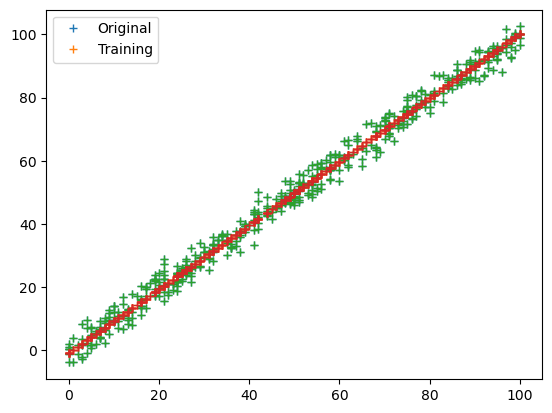

In [45]:
parameters,loss = train(train_input,train_output,0.0001,20)